In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

In [9]:
df_1 = pd.read_csv('Helena _180_.csv')
df_1.head()



,delta t (sec),Ground Acceleration (in G)
0,0.01,-0.000210
1,0.02,-0.000211
2,0.03,-0.000212
3,0.04,-0.000213
4,0.05,-0.000214


In [10]:
df_2 = pd.read_csv('Helena_down_.csv')
df_2.head()

,delta t (sec),Ground Acceleration (in G)
0,0.01,-0.000172
1,0.02,-0.000171
2,0.03,-0.000170
3,0.04,-0.000168
4,0.05,-0.000167


#plot of ground aceleration versus time 

In [ ]:
plt.figure(figsize=(14, 8))

In [11]:
df_1.shape,df_2.shape

((5093, 2), (5106, 2))

In [14]:
df_1['Ground velocity'] = cumtrapz(df_1['Ground Acceleration (in G)'],df_1['delta t (sec)'], initial = 0)
df_1['Ground Displacement'] = cumtrapz(df_1['Ground velocity'],df_1['delta t (sec)'], initial = 0)

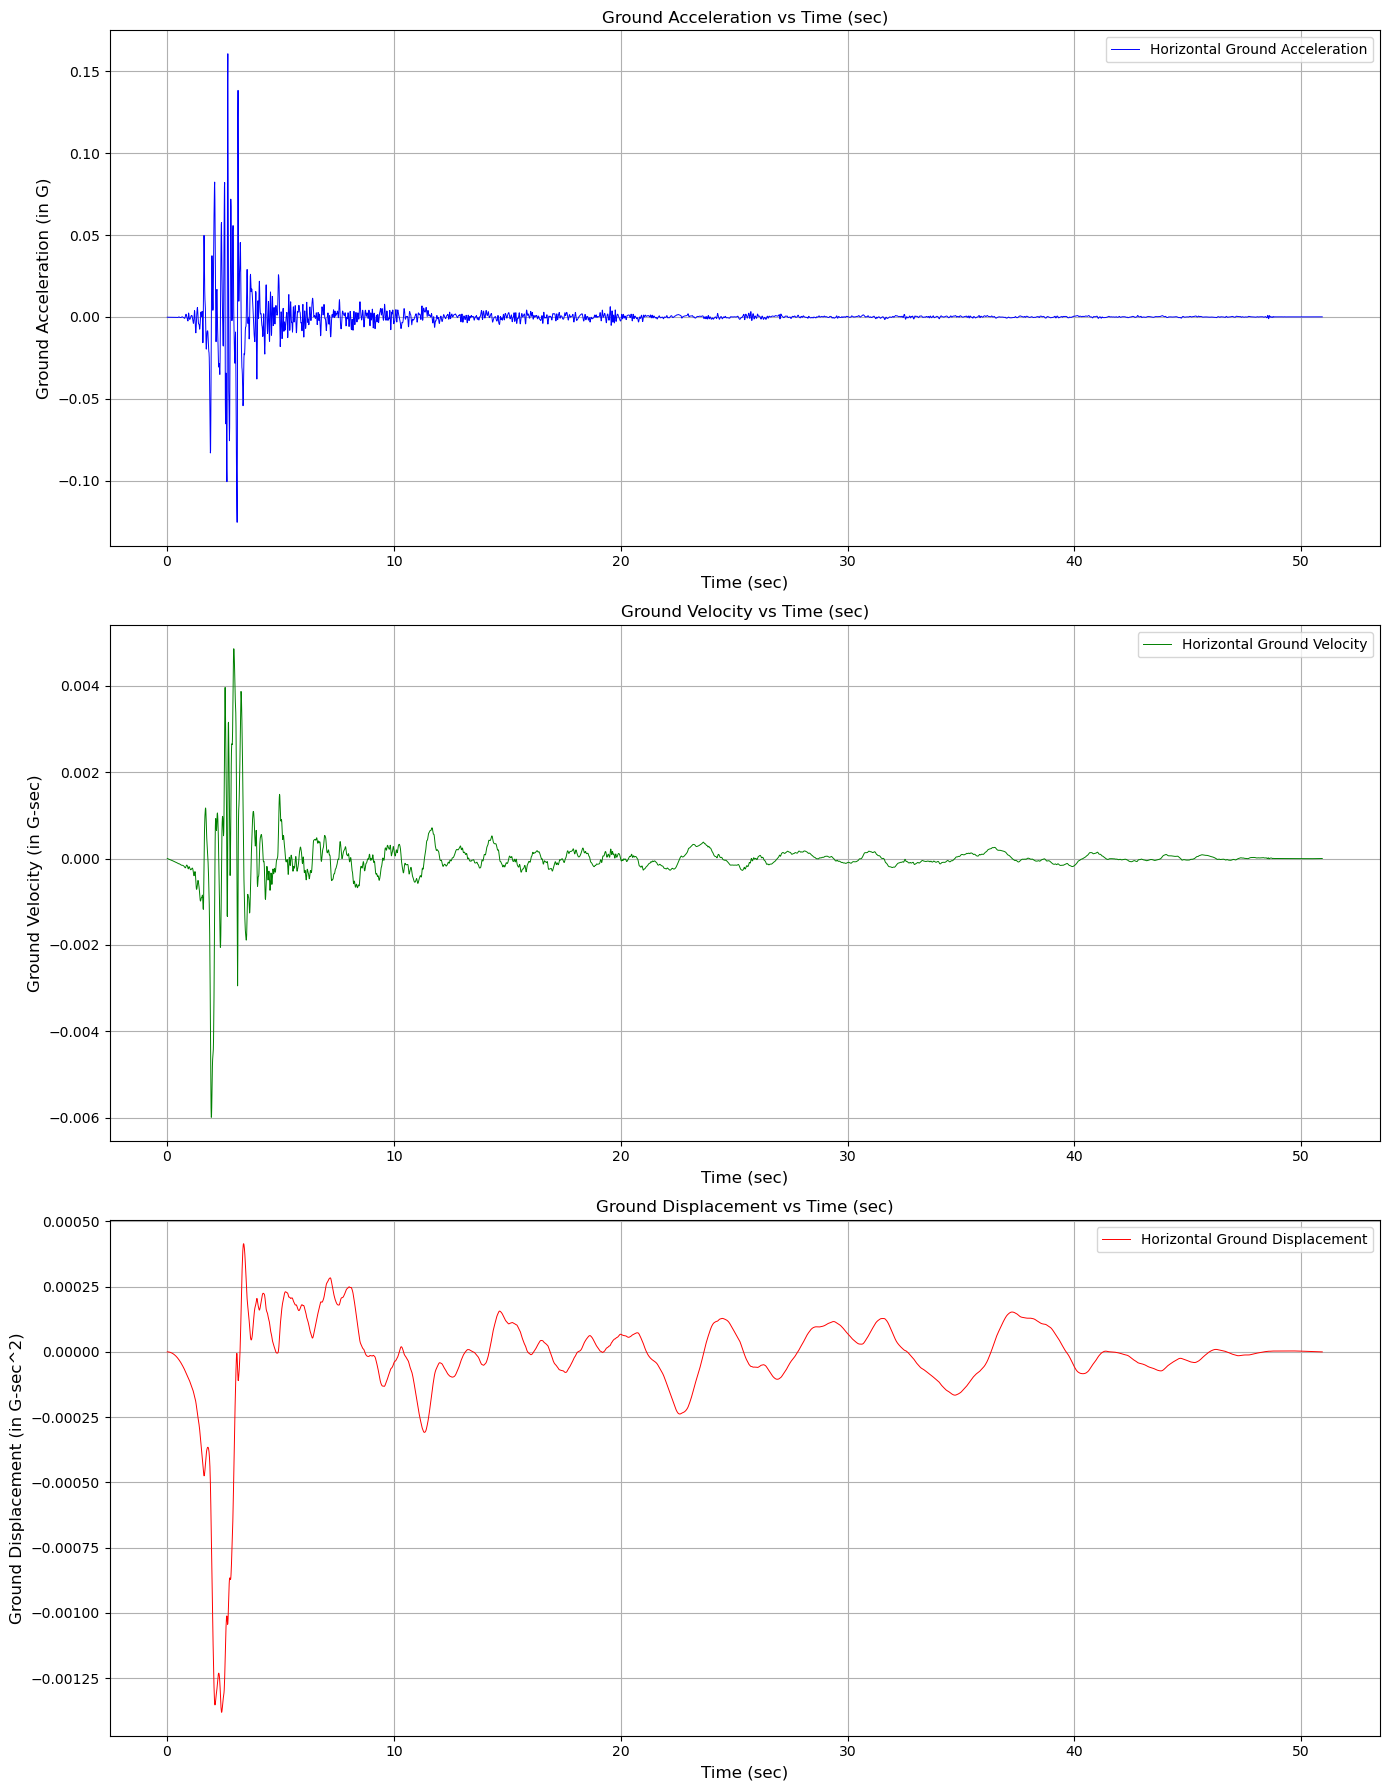

In [15]:

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Plot Ground Acceleration
axes[0].plot(df_1['delta t (sec)'], df_1['Ground Acceleration (in G)'], color='blue', label='Horizontal Ground Acceleration', linewidth=0.7)
axes[0].set_title('Ground Acceleration vs Time (sec)', fontsize=12)
axes[0].set_xlabel('Time (sec)', fontsize=12)
axes[0].set_ylabel('Ground Acceleration (in G)', fontsize=12)
axes[0].legend()
axes[0].grid(True)

# Plot Ground Velocity
axes[1].plot(df_1['delta t (sec)'], df_1['Ground velocity'], color='green', label='Horizontal Ground Velocity', linewidth=0.7)
axes[1].set_title('Ground Velocity vs Time (sec)', fontsize=12)
axes[1].set_xlabel('Time (sec)', fontsize=12)
axes[1].set_ylabel('Ground Velocity (in G-sec)', fontsize=12)
axes[1].legend()
axes[1].grid(True)

# Plot Ground Displacement
axes[2].plot(df_1['delta t (sec)'], df_1['Ground Displacement'], color='red', label='Horizontal Ground Displacement', linewidth=0.7)
axes[2].set_title('Ground Displacement vs Time (sec)', fontsize=12)
axes[2].set_xlabel('Time (sec)', fontsize=12)
axes[2].set_ylabel('Ground Displacement (in G-sec^2)', fontsize=12)
axes[2].legend()
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

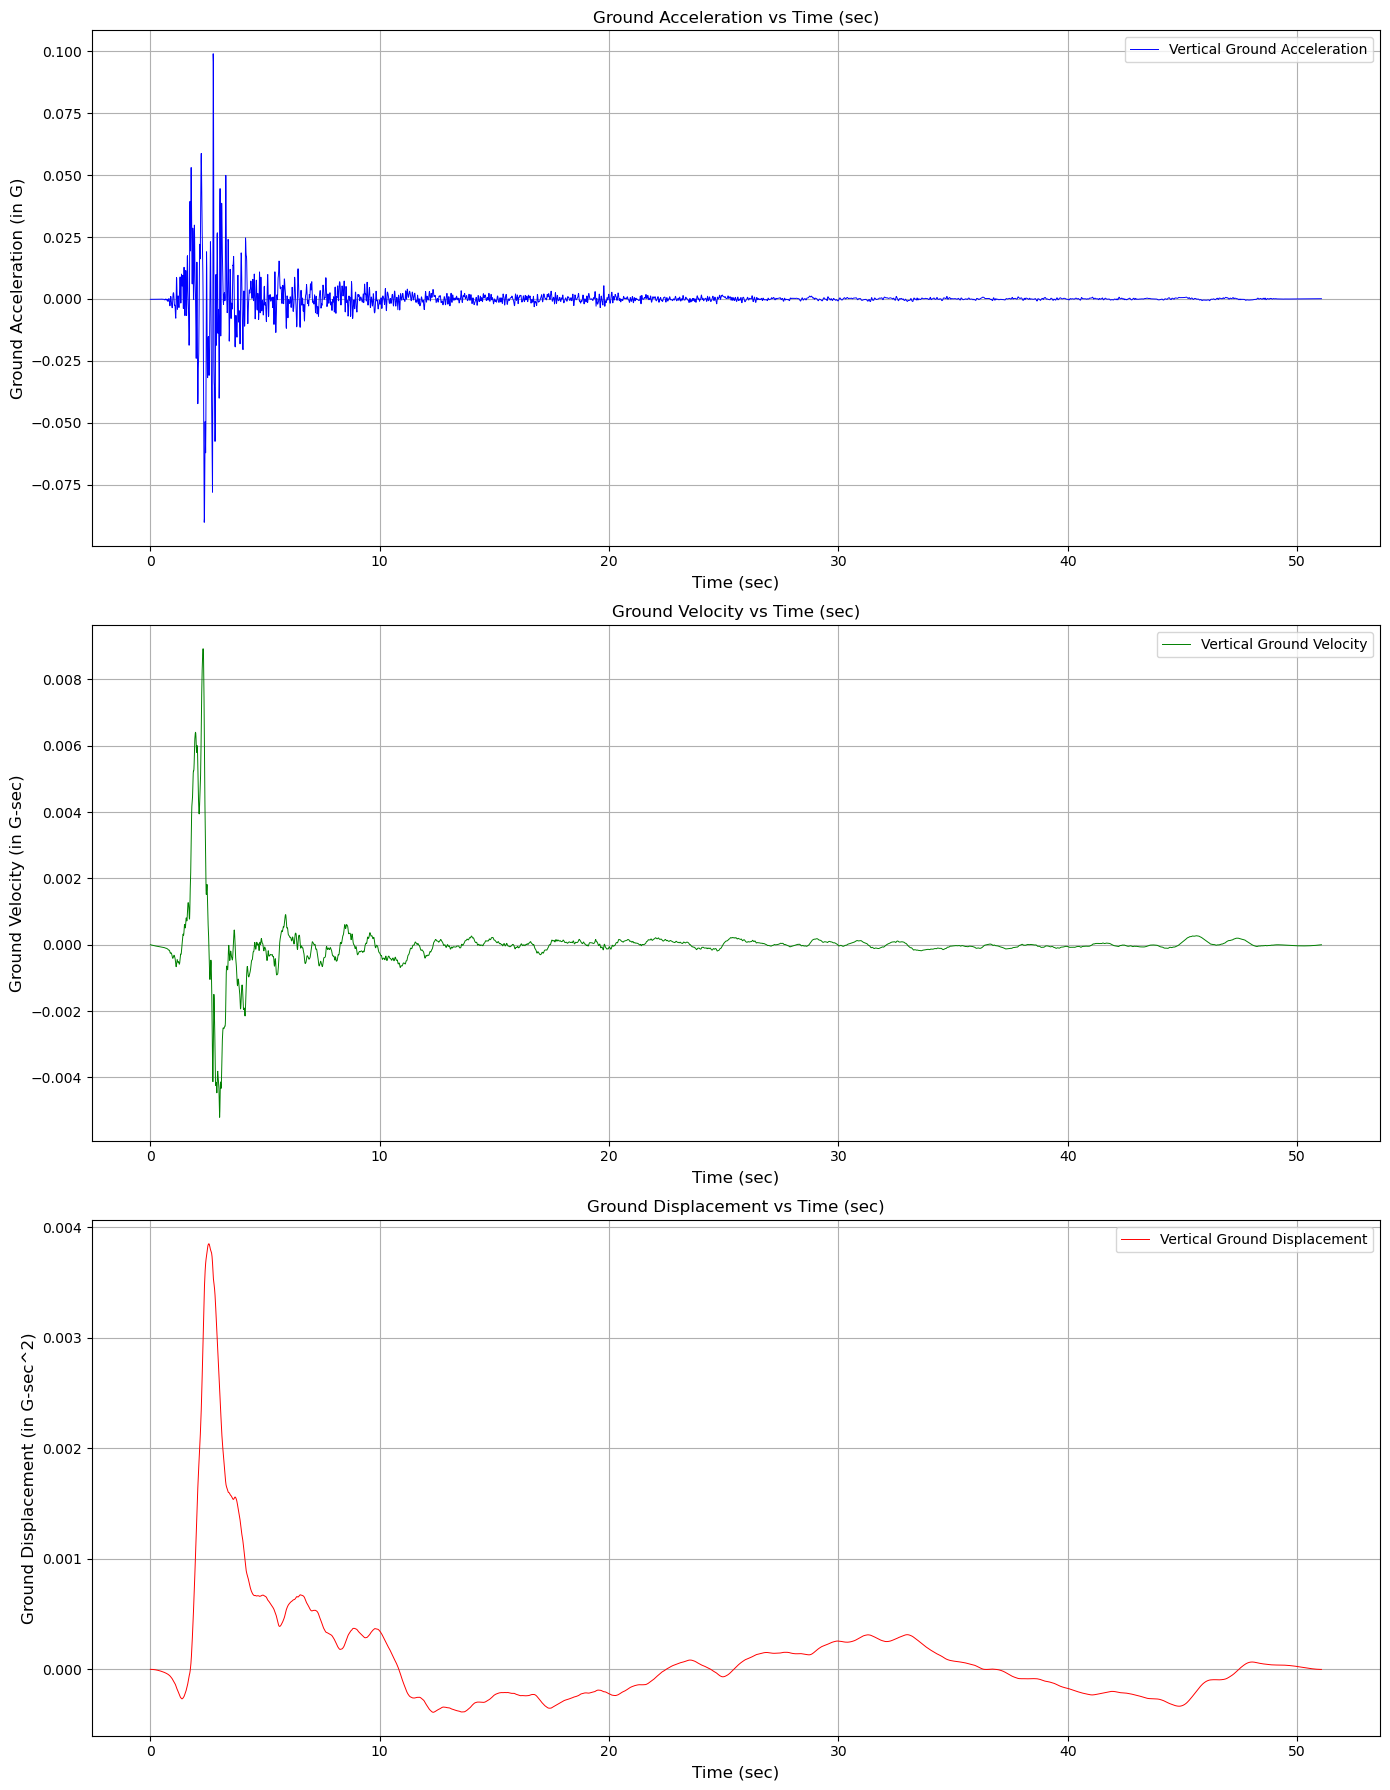

In [16]:
df_2['Ground velocity'] = cumtrapz(df_2['Ground Acceleration (in G)'],df_2['delta t (sec)'], initial = 0)
df_2['Ground Displacement'] = cumtrapz(df_2['Ground velocity'],df_2['delta t (sec)'], initial = 0)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Plot Ground Acceleration
axes[0].plot(df_2['delta t (sec)'], df_2['Ground Acceleration (in G)'], color='blue', label='Vertical Ground Acceleration', linewidth=0.7)
axes[0].set_title('Ground Acceleration vs Time (sec)', fontsize=12)
axes[0].set_xlabel('Time (sec)', fontsize=12)
axes[0].set_ylabel('Ground Acceleration (in G)', fontsize=12)
axes[0].legend()
axes[0].grid(True)

# Plot Ground Velocity
axes[1].plot(df_2['delta t (sec)'], df_2['Ground velocity'], color='green', label='Vertical Ground Velocity', linewidth=0.7)
axes[1].set_title('Ground Velocity vs Time (sec)', fontsize=12)
axes[1].set_xlabel('Time (sec)', fontsize=12)
axes[1].set_ylabel('Ground Velocity (in G-sec)', fontsize=12)
axes[1].legend()
axes[1].grid(True)

# Plot Ground Displacement
axes[2].plot(df_2['delta t (sec)'], df_2['Ground Displacement'], color='red', label='Vertical Ground Displacement', linewidth=0.7)
axes[2].set_title('Ground Displacement vs Time (sec)', fontsize=12)
axes[2].set_xlabel('Time (sec)', fontsize=12)
axes[2].set_ylabel('Ground Displacement (in G-sec^2)', fontsize=12)
axes[2].legend()
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [49]:
#Central difference 

In [20]:
m = 2 



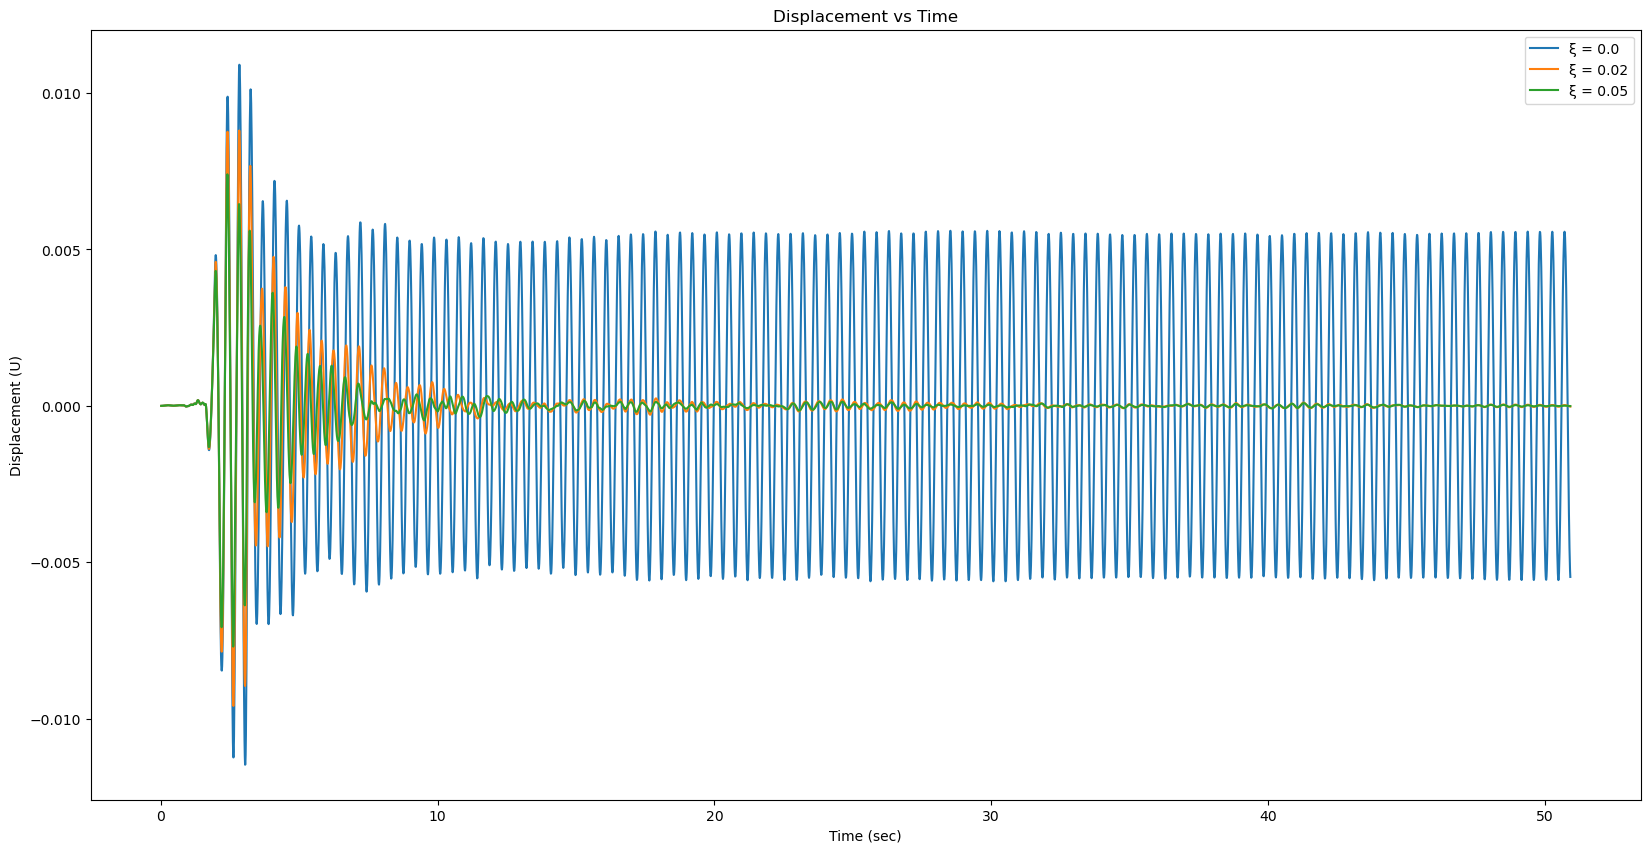

<Figure size 640x480 with 0 Axes>

0.007402078514890001


In [181]:
import numpy as np
import pandas as pd
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

# Assuming df_1 is your DataFrame and m is your mass
# df_1 = ...
# m = ...
k = 400
U_results = {}
V_results = {}
A_results = {}
sheal = [0,0.02,0.05]
c__Val = []
for i in range(len(sheal)):
    c_n = 2*sheal[i]*m*np.sqrt(k/m)
    c__Val.append(c_n)
    
print()

c_values  = c__Val

for c in c_values:
    
    k = 400 
    delta_t = df_1['delta t (sec)'][1] - df_1['delta t (sec)'][0]
    
    # Initialize arrays for displacement, velocity, and acceleration
    U = np.zeros(df_1.shape[0])
    V = np.zeros(df_1.shape[0])
    A = np.zeros(df_1.shape[0])
    
    # Calculate ground velocity and displacement
    df_1['Ground velocity'] = cumtrapz(df_1['Ground Acceleration (in G)'], df_1['delta t (sec)'], initial=0)
    df_1['Ground Displacement'] = cumtrapz(df_1['Ground velocity'], df_1['delta t (sec)'], initial=0)
    
    P = np.array(-m * df_1['Ground Acceleration (in G)'] * 9.81)
    
    a = m / (delta_t ** 2) - c / (2 * delta_t)
    b = k - (2 * m) / delta_t ** 2
    K_hat = m / (delta_t ** 2) + c / (2 * delta_t)
    
    for i in range(1, df_1.shape[0]-1):
        U[i+1] = (P[i] - a * U[i-1] - b * U[i]) / K_hat
        V[i] = (U[i+1] - U[i-1]) / (2 * delta_t)
        A[i] = (P[i] - c * V[i] - k * U[i]) / m
    
    # Store results
    U_results[c] = U.copy()
    V_results[c] = V.copy()
    A_results[c] = A.copy()

# Plotting the results
time = df_1['delta t (sec)']


# Plot displacement
plt.figure(figsize=(20, 10))  # Set the figure size to be large

# Plot displacement
for c in c_values:
    #plt.plot(time, U_results[c], label=f'c = {c}')
    plt.plot(time, U_results[c], label=f'ξ = {c/(2*m*np.sqrt(k/m))}')
plt.xlabel('Time (sec)')
plt.ylabel('Displacement (U)')
plt.legend()
plt.title('Displacement vs Time')
plt.show()



plt.tight_layout()
plt.show()

print(max(U_results[c]) )  

        


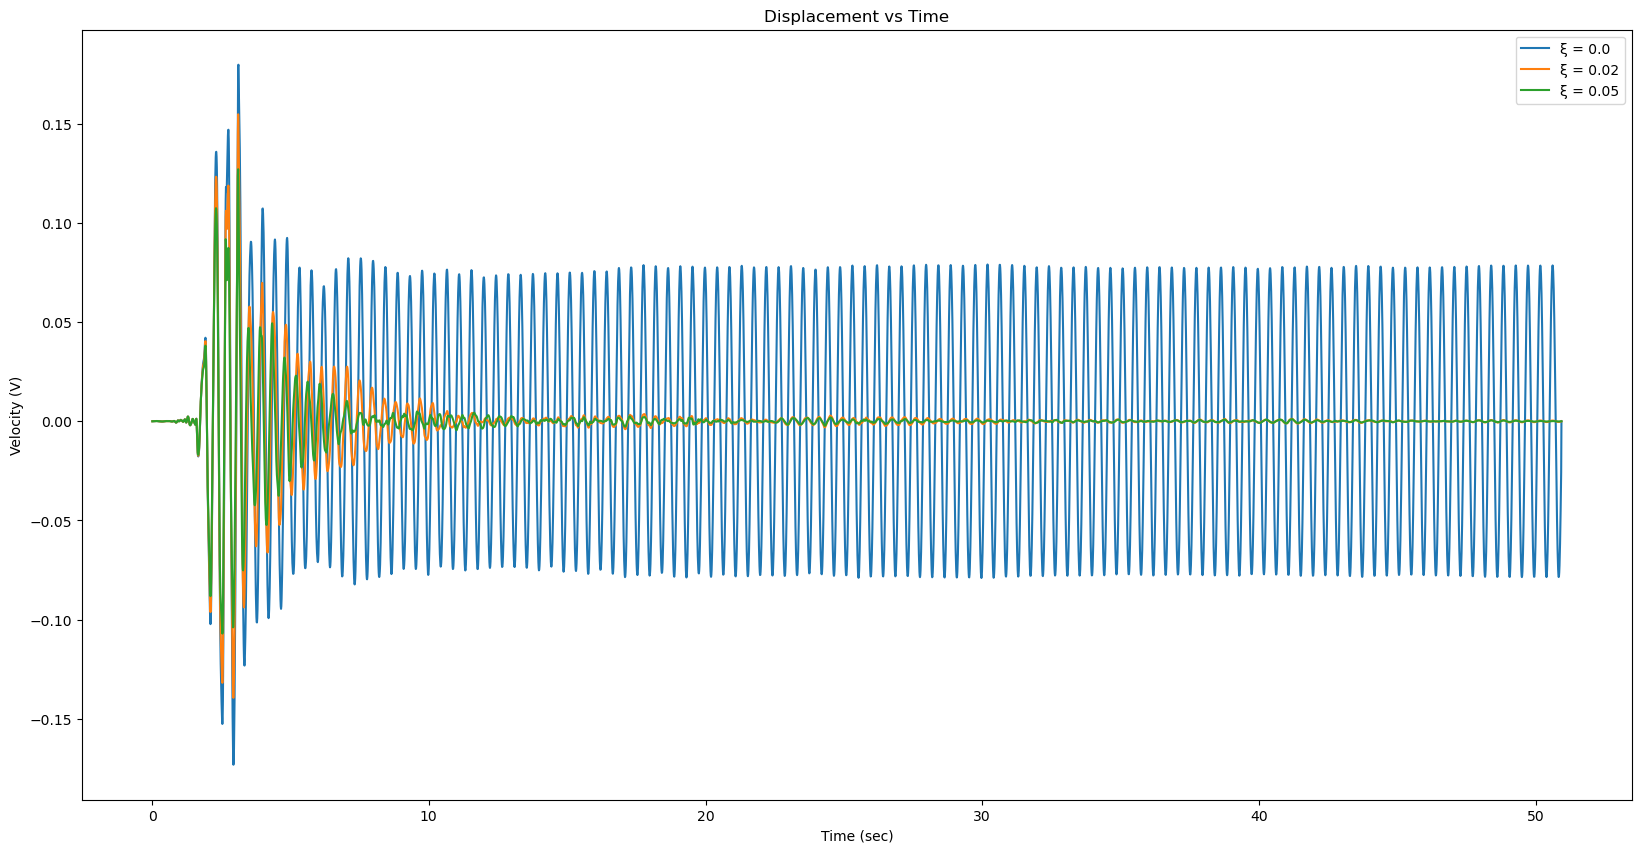

In [182]:

# Plot velocity



plt.figure(figsize=(20, 10))  # Set the figure size to be large

# Plot displacement
for c in c_values:
    plt.plot(time, V_results[c], label=f'ξ = {c/(2*m*np.sqrt(k/m))}')
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (V)')
plt.legend()
plt.title('Displacement vs Time')
plt.show()

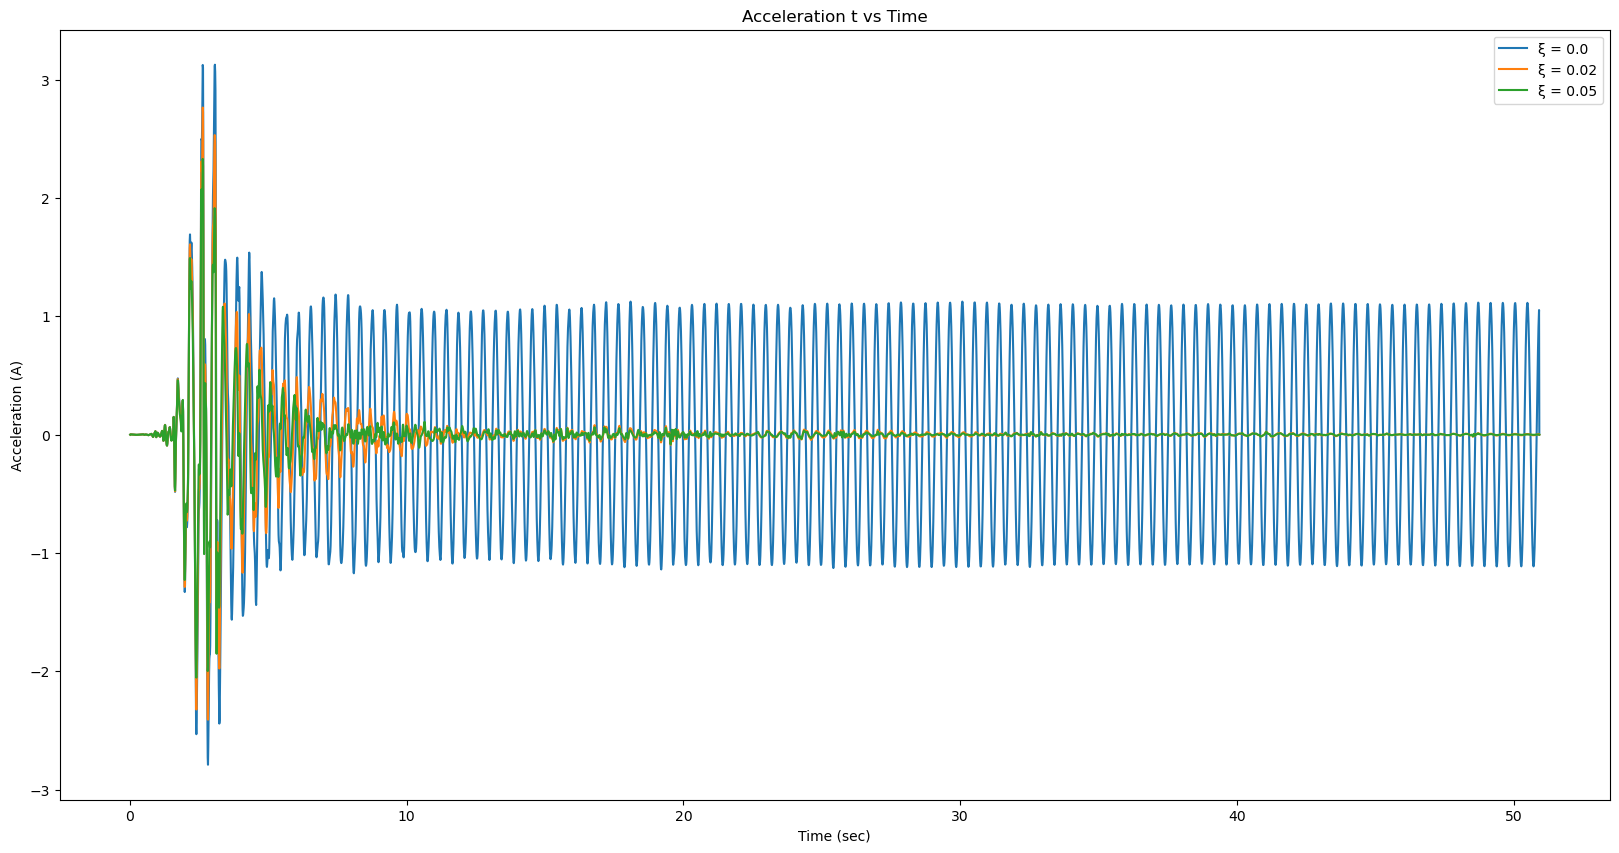

In [107]:

plt.figure(figsize=(20, 10))  # Set the figure size to be large

# Plot displacement
for c in c_values:
    plt.plot(time, A_results[c], label=f'ξ = {c/(2*m*np.sqrt(k/m))}')
    

plt.xlabel('Time (sec)')
plt.ylabel('Acceleration (A)')
plt.legend()
plt.title('Acceleration t vs Time')
plt.show()

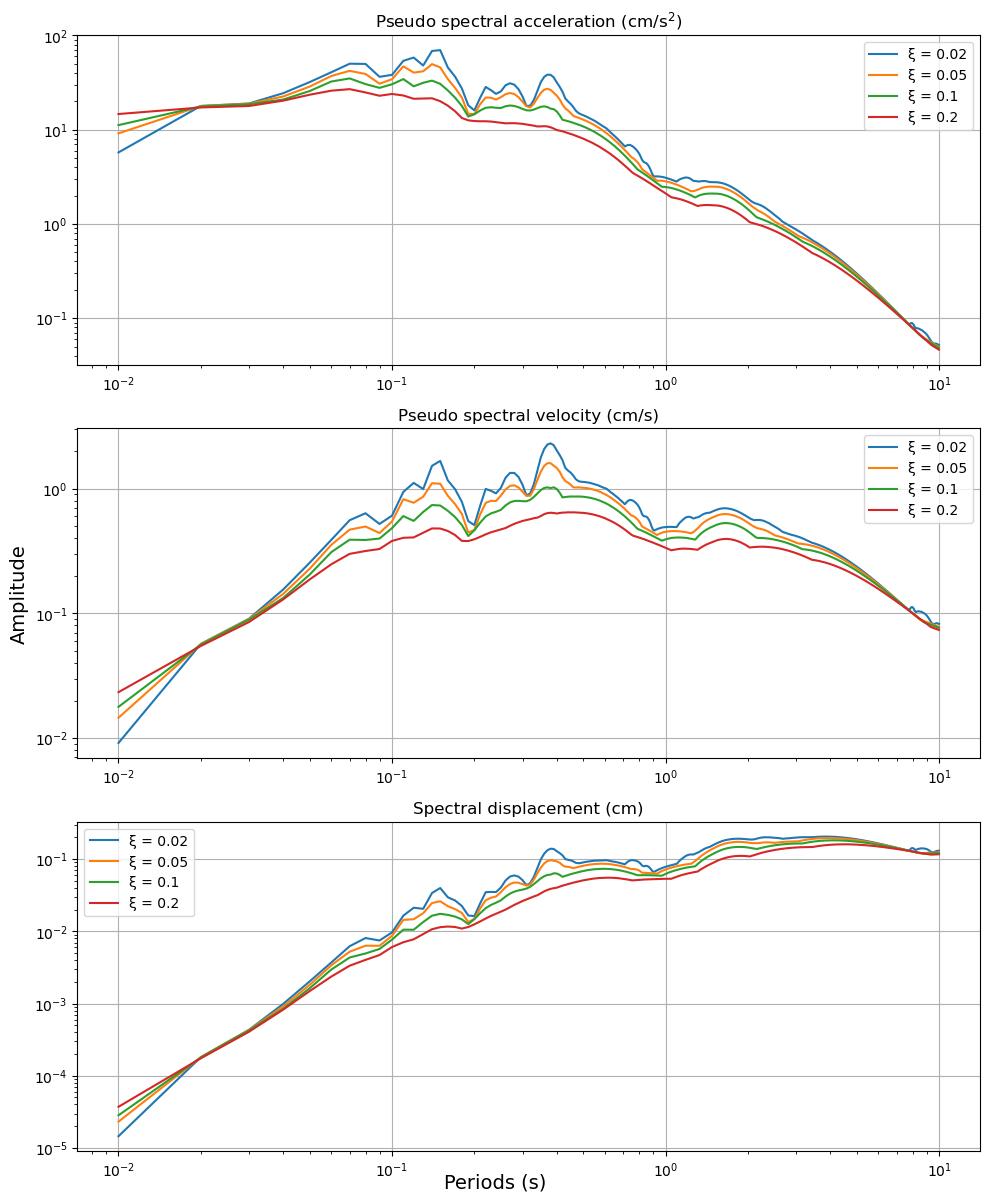

In [36]:
import pandas as pd
from scipy.linalg import expm
from numpy.linalg import pinv
import numpy as np
import matplotlib.pyplot as plt

def El_Centro(data, dt, periods=np.arange(0, 10, 0.05), xi=0):
    '''
    data    = numpy array type object (in acceleration (cm/s^2))
    dt      = sampling interval
    periods = spectral periods (0.01 to 10 seconds with 100 samples)
    xi      = damping factor
        OUTPUTS  
    PSA = Pseudo-spectral acceleration ordinates
    PSV = Pseudo-spectral velocity ordinates
    SD  = spectral displacement ordinates
    '''
    
    A = []; Ae = []; AeB = []
    displ_max = np.empty((len(periods)))
    veloc_max = np.empty((len(periods)))
    absacc_max = np.empty((len(periods)))
    foverm_max = np.empty((len(periods)))
    pseudo_acc_max = np.empty((len(periods)))
    pseudo_veloc_max = np.empty((len(periods)))
    PSA = np.empty((len(periods)))
    PSV = np.empty((len(periods)))
    SD = np.empty((len(periods)))
    
    acc = data
    
    for num, val in enumerate(periods):
        omegan = 2 * np.pi / val  # Angular frequency
        C = 2 * xi * omegan  # Two times the critical damping and angular freq.
        K = omegan**2
        y = np.zeros((2, len(acc)))
        A = np.array([[0, 1], [-K, -C]])
        Ae = expm(A * dt)
        temp_2 = np.dot(Ae - np.eye(2, dtype=int), pinv(A))
        AeB = np.dot(temp_2, np.array([[0.0], [1.0]]))

        for k in np.arange(1, len(acc)):
            y[:, k] = np.reshape(np.add(np.reshape(np.dot(Ae, y[:, k - 1]), (2, 1)), np.dot(AeB, acc[k])), (2))

        displ = np.transpose(y[0, :])  # Relative displacement vector (cm)
        veloc = np.transpose(y[1, :])  # Relative velocity (cm/s)
        foverm = (omegan**2) * displ  # Lateral resisting force over mass (cm/s^2)
        absacc = -2 * xi * omegan * veloc - foverm  # Absolute acceleration from equilibrium (cm/s^2)
        
        displ_max[num] = max(abs(displ))  # Spectral relative displacement (cm)
        veloc_max[num] = max(abs(veloc))  # Spectral relative velocity (cm/s)
        absacc_max[num] = max(abs(absacc))  # Spectral absolute acceleration (cm/s^2)

        foverm_max[num] = max(abs(foverm))  # Spectral value of lateral resisting force over mass (cm/s^2)
        pseudo_acc_max[num] = displ_max[num] * omegan**2  # Pseudo spectral acceleration (cm/s^2)
        pseudo_veloc_max[num] = displ_max[num] * omegan  # Pseudo spectral velocity (cm/s)
        
        PSA[num] = pseudo_acc_max[num]  # PSA (cm/s^2)
        PSV[num] = pseudo_veloc_max[num]  # PSV (cm/s)
        SD[num] = displ_max[num]  # SD  (cm)
        
    return PSA, PSV, SD

def plotting(results, periods, damping_factors, logplot=True):
    fig = plt.figure(figsize=(10, 12))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    for i, xi in enumerate(damping_factors):
        PSA, PSV, SD = results[i]
       
        if logplot:
            ax1.loglog(periods, PSA, label=f'ξ = {xi}')
            ax2.loglog(periods, PSV, label=f'ξ = {xi}')
            ax3.loglog(periods, SD, label=f'ξ = {xi}')
        else:
            ax1.plot(periods, PSA, label=f'ξ = {xi}')
            ax2.plot(periods, PSV, label=f'ξ = {xi}')
            ax3.plot(periods, SD, label=f'ξ = {xi}')
            
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    
    ax1.set_title('Pseudo spectral acceleration ($\mathregular{cm/s^{2}}$)')
    ax2.set_title('Pseudo spectral velocity (cm/s)')
    ax3.set_title('Spectral displacement (cm)')
    
    ax2.set_ylabel('Amplitude', rotation='vertical', fontsize=14)
    
    ax1.legend()
    ax2.legend()
    ax3.legend()
    
    fig.text(0.5, 0.01, 'Periods (s)', ha='center', va='center', fontsize=14)
    plt.tight_layout()
    plt.show()

# Read the data from the Excel file
file_path = r"C:\Users\NGTs\Desktop\Helena _180_.csv"  # Replace with the actual path to your Excel file
df = pd.read_csv(file_path)

# Extract time and acceleration data
time = df['delta t (sec)'].values
acceleration = df['Ground Acceleration (in G)'].values

# Define the sampling interval
dt = time[1] - time[0]

# Define the spectral periods and damping factors
sPeriod = np.arange(0.01, 10, 0.01)
damping_factors = [0.02, 0.05, 0.1, 0.2]

# Compute the pseudo spectral acceleration, velocity, and displacement for each damping factor
results = []
for xi in damping_factors:
    PSA, PSV, SD = El_Centro(acceleration * 100, dt, periods=sPeriod, xi=xi)
    results.append((PSA, PSV, SD))

# Plot the results
plotting(results, sPeriod, damping_factors, logplot=True)
